In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
from lets_plot import *
LetsPlot.setup_html()

df = pd.read_csv('probability.csv')
df

,tempi_rosta
0,108.6
1,101.8
2,103.6
3,102.6
4,103.6
...,...
95,101.3
96,103.6
97,101.3
98,105.7


In [2]:
df, df0 = df.copy()['tempi_rosta'], df
lgn = np.log10(len(df))
N = 1 + 3.322 * lgn
R = df.max() - df.min()
h = R / N
print(f'xmin = {df.min()}, xmax = {df.max()}, R = {R:.2f}, h = {h:.2f}')

xmin = 99.0, xmax = 108.6, R = 9.60, h = 1.26


In [3]:
# Определение граничных значений интервалов
lim = df.min() - h / 2  # левая граница первого итервала
lims = [lim]
while lim < df.max():
    lim += h
    lims.append(lim)

df_bins = pd.DataFrame(pd.cut(df, bins=lims).value_counts().sort_index())  # группировка и расчет частот
df_bins  = df_bins.reset_index()
df_bins['cumul'] = np.cumsum(df_bins['count'])  # расчет накопленных частот
df_bins['mid'] = df_bins['tempi_rosta'].apply(lambda x: (x.left + x.right) / 2).astype(float)  # расчет середин интервалов
df_bins['dolya'] = df_bins['count'] / 100
df_bins['dolya/h'] = df_bins['dolya'] / h
df_bins

,tempi_rosta,count,cumul,mid,dolya,dolya/h
0,"(98.372, 99.628]",2,2,99.0000,0.02,0.015925
1,"(99.628, 100.884]",8,10,100.2560,0.08,0.063700
2,"(100.884, 102.14]",17,27,101.5120,0.17,0.135363
3,"(102.14, 103.396]",17,44,102.7680,0.17,0.135363
4,"(103.396, 104.651]",29,73,104.0235,0.29,0.230913
5,"(104.651, 105.907]",17,90,105.2790,0.17,0.135363
6,"(105.907, 107.163]",6,96,106.5350,0.06,0.047775
7,"(107.163, 108.419]",3,99,107.7910,0.03,0.023888
8,"(108.419, 109.675]",1,100,109.0470,0.01,0.007963


In [4]:
# 2а) Средняя арифметическая (взвешенная по интервалам)
mean_weighted = np.sum(df_bins['mid'] * df_bins['count']) / np.sum(df_bins['count'])
mean_direct = np.mean(df)  # для сравнения
print(f"Средняя арифметическая:")
print(f"   По вариационному ряду: {mean_weighted:.4f}")
print(f"   Прямое вычисление: {mean_direct:.4f}")

Средняя арифметическая:
   По вариационному ряду: 103.5086
   Прямое вычисление: 103.5150


In [5]:
# 2б) Центральные моменты
n = len(df)
k1 = np.sum((df - mean_direct)**1) / n
k2 = np.sum((df - mean_direct)**2) / n  # Дисперсия
k3 = np.sum((df - mean_direct)**3) / n
k4 = np.sum((df - mean_direct)**4) / n

print(f"Центральные моменты:")
print(f"   μ₁ = {k1:.6f}")
print(f"   μ₂ = {k2:.6f} (дисперсия)")
print(f"   μ₃ = {k3:.6f}")
print(f"   μ₄ = {k4:.6f}")

Центральные моменты:
   μ₁ = -0.000000
   μ₂ = 3.751475 (дисперсия)
   μ₃ = 0.615590
   μ₄ = 34.589417


In [6]:
# 2в) Дисперсия и СКО
variance = k2  # μ₂ - это дисперсия
std_dev = np.sqrt(variance)

print(f"Дисперсия и СКО:")
print(f"   Дисперсия S² = {variance:.6f}")
print(f"   СКО S = {std_dev:.6f}")

Дисперсия и СКО:
   Дисперсия S² = 3.751475
   СКО S = 1.936872


In [7]:
# 2г) Коэффициент асимметрии и эксцесса
skewness = k3 / (std_dev**3)
kurtosis = k4 / (std_dev**4) - 3  # Эксцесс относительно нормального распределения

print(f"Коэффициенты формы:")
print(f"   Асимметрия A = {skewness:.6f}")
print(f"   Эксцесс E = {kurtosis:.6f}")

Коэффициенты формы:
   Асимметрия A = 0.084721
   Эксцесс E = -0.542242


In [8]:
# МЕДИАНА
# Способ 1: По исходным данным
median_direct = np.median(df)

# Способ 2: По интервальному ряду
median_interval = df_bins.iloc[4] # принимаем за медианный интервал четвертый (cumul > 50)

L_me = median_interval['tempi_rosta'].left  # нижняя граница медианного интервала
f_me = median_interval['count']  # частота медианного интервала
F_me_prev = df_bins.iloc[3]['cumul'] # накопленная частота до медианного интервала

# Формула для медианы в интервальном ряду: Me = L_me + h_me * (n/2 - F_me_prev) / f_me
median_interval_calc = L_me + h * (n/2 - F_me_prev) / f_me

print(f"Медиана:")
print(f"   - По исходным данным: Me = {median_direct:.4f}")
print(f"   - По интервальному ряду: Me ≈ {median_interval_calc:.4f}")

Медиана:
   - По исходным данным: Me = 103.6000
   - По интервальному ряду: Me ≈ 103.6558


In [9]:
# МОДА
# Способ 1: По исходным данным (наиболее часто встречающееся значение)
mode_direct = stats.mode(df).mode

# Способ 2: По интервальному ряду
# Так как медианный интервал у нас совпал с модальным просто перезапишем необходимые переменные
L_mo, f_mo = L_me, f_me

# Частоты соседних интервалов
f_mo_prev = df_bins.iloc[4-1]['count']
f_mo_next = df_bins.iloc[4+1]['count']

# Формула для моды в интервальном ряду: Mo = L_mo + h_mo * (f_mo - f_mo_prev) / (2 * f_mo - f_mo_prev - f_mo_next)
mode_interval_calc = L_mo + h * (f_mo - f_mo_prev) / (2 * f_mo - f_mo_prev - f_mo_next)

print(f"Мода:")
print(f"   - По исходным данным: Mo = {mode_direct:.4f}")
print(f"   - По интервальному ряду: Mo ≈ {mode_interval_calc:.4f}")

Мода:
   - По исходным данным: Mo = 103.6000
   - По интервальному ряду: Mo ≈ 104.0239


In [10]:
# е) Коэффициент вариации
coef_var = (std_dev / mean_direct) * 100

print(f"Коэффициент вариации:")
print(f"   V = {coef_var:.2f}%")

Коэффициент вариации:
   V = 1.87%


In [11]:
histogram_plot = (
    ggplot(df_bins[['mid', 'dolya']], aes(x='mid', y='dolya'))
    + geom_bar(stat='identity', width=h*0.8, fill='blue', color='black')
    + labs(title='Гистограмма распределения темпов роста',
           x='Темпы роста',
           y='Доля выборки')
    + theme_minimal()
)
histogram_plot

In [12]:
plot = (
    ggplot(df_bins[['mid', 'dolya']], aes(x='mid', y='dolya'))
    + geom_point(color='pink', size=4)
    + geom_line(color='pink', size=1.3)
    + labs(title='Полигон',
           x='Велечина темпа роста',
           y='Доля выборки')
)
plot

In [13]:
plot = (
    ggplot(df_bins[['mid', 'cumul']], aes(x='mid', y='cumul'))
    + geom_point(size=2)
    + geom_line()
    + labs(title='Polygon',
           x='Велечина темпа роста',
           y='Частота')
)
plot

# Объединенный график: гистограмма + полигон
combined_plot = (
    ggplot(df_bins[['mid', 'cumul']], aes(x='mid', y='cumul'))
    # Гистограмма (столбцы)
    + geom_bar(stat='identity', width=h*0.8, fill='green', color='black', alpha=0.7)
    # Полигон (линия)
    + geom_line(color='orange', size=1.3)
    # Полигон (точки)
    + geom_point(color='orange', size=4)
    + labs(title='Кумулята',
           x='Темпы роста',
           y='Накопленные частоты')
    + theme_minimal()
)
combined_plot

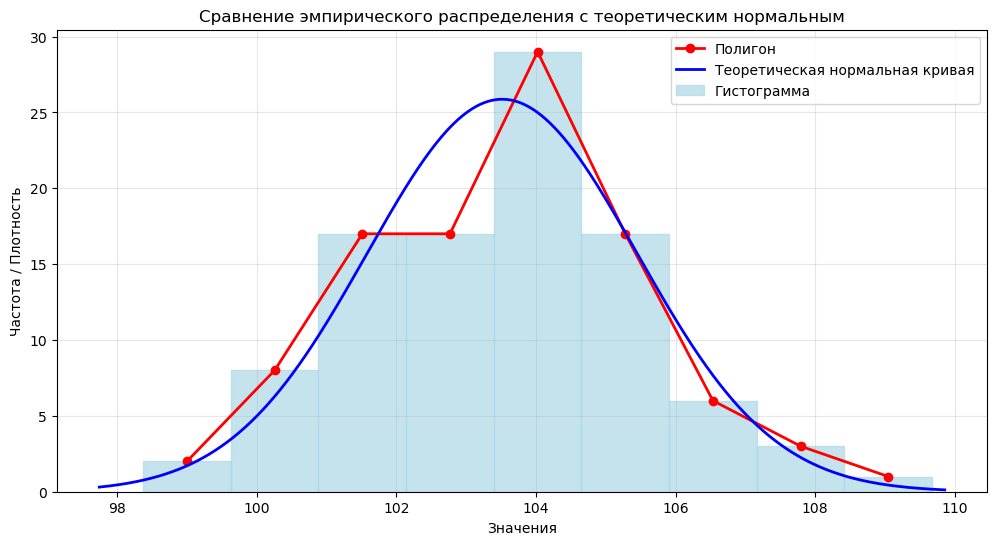

In [14]:
# 5. Теоретическое нормальное распределение
# Плотность теоретического нормального распределения
x_theor = np.linspace(df.min() - h, df.max() + h, 1000)
pdf_theor = norm.pdf(x_theor, mean_direct, std_dev)

# Масштабирование плотности для сравнения с гистограммой
scale_factor = n * h
pdf_scaled = pdf_theor * scale_factor

# Построение гистограммы с теоретической кривой
plt.figure(figsize=(12, 6))

# Гистограмма с соединенными столбиками (без промежутков)
plt.bar(df_bins['mid'], df_bins['count'], width=h, 
        alpha=0.7, color='lightblue', edgecolor='lightblue', label='Гистограмма')

# Полигон
plt.plot(df_bins['mid'], df_bins['count'], 'ro-', linewidth=2, markersize=6, label='Полигон')

# Теоретическая нормальная кривая
plt.plot(x_theor, pdf_scaled, 'b-', linewidth=2, label='Теоретическая нормальная кривая')

plt.xlabel('Значения')
plt.ylabel('Частота / Плотность')
plt.title('Сравнение эмпирического распределения с теоретическим нормальным')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
# 6. Проверка гипотезы о нормальном распределении (критерий Пирсона)
# Вычисление теоретических частот для каждого интервала
expected_freq = []
for interval in df_bins['tempi_rosta']:
    # Вероятность попадания в интервал для нормального распределения
    prob = norm.cdf(interval.right, mean_direct, std_dev) - norm.cdf(interval.left, mean_direct, std_dev)
    expected_freq.append(prob * len(df))

df_bins['expected'] = expected_freq

# Объединение интервалов с малыми ожидаемыми частотами (меньше 5)
df_chi2 = df_bins.copy()
i = 0
while i < len(df_chi2) - 1:
    if df_chi2.loc[i, 'expected'] < 5:
        # Объединяем с соседним интервалом
        if i == 0:
            # Объединяем с правым соседом
            df_chi2.loc[i+1, 'count'] += df_chi2.loc[i, 'count']
            df_chi2.loc[i+1, 'expected'] += df_chi2.loc[i, 'expected']
            df_chi2 = df_chi2.drop(i).reset_index(drop=True)
        else:
            # Объединяем с левым соседом
            df_chi2.loc[i-1, 'count'] += df_chi2.loc[i, 'count']
            df_chi2.loc[i-1, 'expected'] += df_chi2.loc[i, 'expected']
            df_chi2 = df_chi2.drop(i).reset_index(drop=True)
    else:
        i += 1

# Проверка последнего интервала
if len(df_chi2) > 0 and df_chi2.iloc[-1]['expected'] < 5:
    if len(df_chi2) > 1:
        df_chi2.loc[len(df_chi2)-2, 'count'] += df_chi2.iloc[-1]['count']
        df_chi2.loc[len(df_chi2)-2, 'expected'] += df_chi2.iloc[-1]['expected']
        df_chi2 = df_chi2.drop(len(df_chi2)-1).reset_index(drop=True)

# Вычисление статистики хи-квадрат
chi2_stat = np.sum((df_chi2['count'] - df_chi2['expected'])**2 / df_chi2['expected'])
degrees_of_freedom = len(df_chi2) - 3  # k - 3 (оценили mean и std)

# Критическое значение для α=0.05
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

print(f"Статистика хи-квадрат: {chi2_stat:.4f}")
print(f"Число степеней свободы: {degrees_of_freedom}")
print(f"Критическое значение (α=0.05): {critical_value:.4f}")

if chi2_stat < critical_value:
    print("✓ Гипотеза о нормальном распределении НЕ ОТВЕРГАЕТСЯ")
    print(f"  (χ² = {chi2_stat:.4f} < {critical_value:.4f})")
else:
    print("✗ Гипотеза о нормальном распределении ОТВЕРГАЕТСЯ")
    print(f"  (χ² = {chi2_stat:.4f} ≥ {critical_value:.4f})")

# p-value
p_value = 1 - stats.chi2.cdf(chi2_stat, degrees_of_freedom)
print(f"p-value: {p_value:.6f}")

# Расчет коэффициента вариации
coef_variation = (std_dev / mean_direct) * 100

print("\n" + "-"*50)
print("СВОДНЫЕ РЕЗУЛЬТАТЫ")


print(f"Объем выборки: n = {len(df)}")
print(f"Среднее: {mean_direct:.4f}")
print(f"Стандартное отклонение: {std_dev:.4f}")
print(f"Асимметрия: {skewness:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")
print(f"Коэффициент вариации: {coef_variation:.2f}%")

Статистика хи-квадрат: 3.2876
Число степеней свободы: 3
Критическое значение (α=0.05): 7.8147
✓ Гипотеза о нормальном распределении НЕ ОТВЕРГАЕТСЯ
  (χ² = 3.2876 < 7.8147)
p-value: 0.349368

--------------------------------------------------
СВОДНЫЕ РЕЗУЛЬТАТЫ
Объем выборки: n = 100
Среднее: 103.5150
Стандартное отклонение: 1.9369
Асимметрия: 0.0847
Эксцесс: -0.5422
Коэффициент вариации: 1.87%
